# TensorFlow

**Deep learning techniques and frameworks**
* What is tensor flow?
* Features of tensor flow.
* TensorFlow Applications.
* How TensorFlow works?
* Tensorflow 1.0 vs 2.0
* Tensorflow 2.0 Architecture.
* Tensorflow Demo

**Deep Learning Frameworks**
* Kerras
* TensorFlow
* Pytorch
* Caffe
* Theano
* DL4J
* Chainer

**Features of Tensorflow**
* Works with Multi-dimensional array
* Provides scalability of computation across machines and large datasets.
* Supports fast debugging and model building.
* Has a large community and provides Tensorboard to visualize the data.

**Tensorflow applications**
* Face Detection.
* Langauage translation.
* Fraud detection.
* Video detection.

2. **Keras** it is the official **high-level** API of TensorFlow 2.0. It has incorporated Keras as **tf.keras**.Keras provides a number of model building APIs such as *Sequential, Functional and Subclassing,* so you can choose the right level of abstraction for your project.

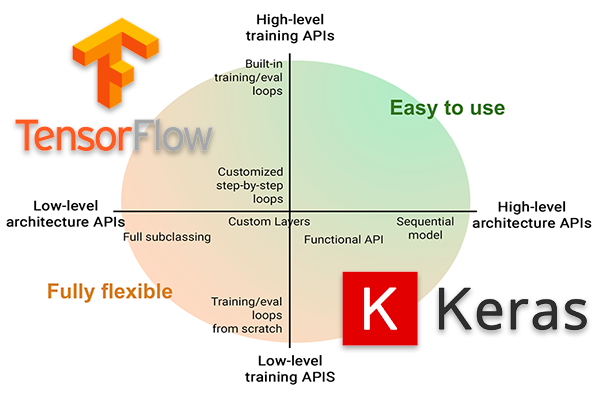

# TENSORFLOW DEMO

**Import all the libraries**

In [2]:
#Import the necessary Libraries
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch',edgecolor='dimgray',linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="last_expr"
pd.options.display.max_columns=50
%matplotlib inline
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Import the packages from Keras and Sklearn**

In [ ]:
#Import the functions from Keras and Sklearn Libraries
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

**Import the dataset to work with**

In [12]:
#With pd read we upload the Airquality dataset
df= pd.read_csv('/kaggle/input/air-quality/Air quality.csv',sep=' ')
df.head(10)

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22
0,1,BANDUNG,2019-05-19,00:04:19,21.35,0.78,6.77,14.06,26.168,409.86,251.202,0.0,0.0,0.0,2.77,0.0,21.4,100.0,0.600,5,9,BAIK,NaN
1,2,BANDUNG,2019-05-19,00:15:01,5.93,0.82,14.87,17.23,53.853,394.79,501.356,0.0,0.0,0.0,11.95,0.0,42.6,200.0,0.000,2,12,BAIK,NaN
2,3,BANDUNG,2019-05-19,00:30:06,6.62,0.63,22.24,2.31,38.304,390.66,753.291,0.0,0.0,0.0,12.71,0.0,63.6,299.2,0.000,2,13,BAIK,NaN
3,4,BANDUNG,2019-05-19,00:49:19,13.29,0.44,19.00,5.32,18.962,401.23,251.043,0.0,0.0,0.0,1.20,0.0,21.3,88.2,0.525,5,6,BAIK,NaN
4,5,BANDUNG,2019-05-19,01:04:19,2.44,0.47,26.74,13.61,35.270,381.67,250.471,0.0,0.0,0.0,3.52,0.0,21.3,97.4,0.975,5,9,BAIK,NaN
5,6,BANDUNG,2019-05-19,01:19:19,1.17,0.37,19.90,24.76,45.130,391.49,251.088,0.0,0.0,0.0,5.99,0.0,21.1,87.7,0.675,5,15,BAIK,NaN
6,7,BANDUNG,2019-05-19,01:49:19,7.84,0.28,21.16,21.90,39.063,392.45,249.623,0.0,0.0,0.0,0.37,0.0,20.5,100.0,0.375,4,14,BAIK,NaN
7,8,BANDUNG,2019-05-19,02:04:19,3.87,0.26,22.60,15.12,63.714,384.96,250.983,0.0,0.0,0.0,0.82,0.0,20.4,100.0,0.225,5,9,BAIK,NaN
8,9,BANDUNG,2019-05-19,02:15:44,4.66,0.37,24.40,36.82,41.338,402.94,251.399,0.0,0.0,0.0,11.39,0.0,19.9,100.0,0.000,1,23,BAIK,NaN
9,10,BANDUNG,2019-05-19,02:34:19,14.83,0.37,24.40,19.19,26.547,394.13,250.089,0.0,0.0,0.0,1.43,0.0,20.2,100.0,0.075,4,12,BAIK,NaN


**Convert time to Datetime Format**

In [17]:
#Convert time to Datetime format

def combine_date(df, tab_name):
    list_tab = []
    for i in range(df.shape[0]):
        list_tab.append(df.loc[i, 'Tanggal'] + 'T' + df.loc[i, tab_name][0:2])
    return np.array(list_tab, dtype='datetime64')


      

In [19]:
#convert time to Datetime format
df['Datetime'] = combine_date(df, 'Jam')
df.head() #check the changes done to the dataframe datetime row has being added.

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22,Datetime
0,1,BANDUNG,2019-05-19,00:04:19,21.35,0.78,6.77,14.06,26.168,409.86,251.202,0.0,0.0,0.0,2.77,0.0,21.4,100.0,0.600,5,9,BAIK,NaN,2019-05-19 00:00:00
1,2,BANDUNG,2019-05-19,00:15:01,5.93,0.82,14.87,17.23,53.853,394.79,501.356,0.0,0.0,0.0,11.95,0.0,42.6,200.0,0.000,2,12,BAIK,NaN,2019-05-19 00:00:00
2,3,BANDUNG,2019-05-19,00:30:06,6.62,0.63,22.24,2.31,38.304,390.66,753.291,0.0,0.0,0.0,12.71,0.0,63.6,299.2,0.000,2,13,BAIK,NaN,2019-05-19 00:00:00
3,4,BANDUNG,2019-05-19,00:49:19,13.29,0.44,19.00,5.32,18.962,401.23,251.043,0.0,0.0,0.0,1.20,0.0,21.3,88.2,0.525,5,6,BAIK,NaN,2019-05-19 00:00:00
4,5,BANDUNG,2019-05-19,01:04:19,2.44,0.47,26.74,13.61,35.270,381.67,250.471,0.0,0.0,0.0,3.52,0.0,21.3,97.4,0.975,5,9,BAIK,NaN,2019-05-19 01:00:00


**convert into hourly data**

In [20]:
# convert into hourly data

df = df[['Datetime','O3','CO','NO2','SO2','NO','CO2','VOC','PM1','PM2.5','PM4','PM10','TSP','TEMP','HUM','WS','WD','ISPU']]
df2 = df.groupby(['Datetime']).mean()
df2.head()

,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU
Datetime,,,,,,,,,,,,,,,,,
2019-05-19 00:00:00,11.797500,0.667500,15.720,9.7300,34.32175,399.135000,439.22300,0.0,0.0,0.0,7.157500,0.0,37.225000,171.850000,0.28125,3.500000,10.000000
2019-05-19 01:00:00,3.816667,0.373333,22.600,20.0900,39.82100,388.536667,250.39400,0.0,0.0,0.0,3.293333,0.0,20.966667,95.033333,0.67500,4.666667,12.666667
2019-05-19 02:00:00,6.450000,0.332500,24.130,26.3100,51.29325,396.242500,251.04575,0.0,0.0,0.0,6.487500,0.0,20.150000,97.500000,0.09375,3.750000,16.250000
2019-05-19 03:00:00,4.740000,0.180000,25.975,24.3900,43.51850,401.355000,252.24875,0.0,0.0,0.0,4.700000,0.0,19.850000,100.000000,0.07500,5.000000,15.000000
2019-05-19 04:00:00,19.692500,0.202500,20.395,18.6225,53.37925,399.335000,694.23975,0.0,0.0,0.0,5.262500,0.0,53.475000,272.500000,0.18750,5.250000,13.250000


**Get description of all the variables**

In [22]:
#decriptive information of all variables
df2.describe()

,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,8.538909,0.233172,16.681910,12.013894,37.086256,394.616480,260.053778,0.309564,0.383692,0.451982,6.157770,0.562012,25.266942,77.634191,24.291226,7.129031,10.097848
std,3.997292,0.388102,5.373487,4.411251,12.521778,4.180224,60.773321,2.286104,2.874126,3.378291,4.149511,4.184787,6.707977,29.743129,51.993683,3.523245,5.049788
min,0.270000,0.010000,2.040000,2.162500,3.128750,380.420000,187.518000,0.000000,0.000000,0.000000,0.885000,0.000000,11.250000,26.866667,0.000000,0.000000,4.250000
25%,5.881667,0.083333,13.010000,9.015000,28.443500,391.830000,247.798333,0.000000,0.000000,0.000000,4.340000,0.000000,21.266667,57.850000,0.237500,4.666667,8.166667
50%,7.813333,0.160000,15.916667,11.730000,39.252250,394.602000,250.926250,0.000000,0.000000,0.000000,5.571667,0.000000,24.100000,77.083333,1.312500,5.833333,9.500000
75%,10.373333,0.296667,19.935000,14.595000,46.015500,397.415000,253.286667,0.000000,0.000000,0.000000,7.090000,0.000000,28.400000,94.066667,5.075000,10.500000,11.000000
max,33.741667,13.950000,99.600000,46.290000,194.554000,408.820000,1240.713500,51.600000,68.700000,79.800000,91.600000,92.900000,124.600000,313.400000,199.200000,15.000000,156.500000


**Dig a little deeper into each Variable**

In [23]:
#Calculate quantile for each variable
# calculate quantile from each attributes
def calculate_quantile (i, df2):
    Q1 = df2[[i]].quantile(0.25)[0]
    Q3 = df2[[i]].quantile(0.75)[0]
    IQR = Q3 - Q1
    min = df2[[i]].min()[0]
    max = df2[[i]].max()[0]
    min_IQR = Q1 - 1.5*IQR
    max_IQR = Q3 + 1.5*IQR
    
    return Q1, Q3, min, max, min_IQR, max_IQR

# delete first and last rows to avoid missing value extrapolation
df2.drop(index=[df2.index[0], df2.index[df2.shape[0]-1]], inplace=True)

# find and interpolate the outliers
for i in df2.columns:
    print('\nAttribute-',i,':')
    Q1, Q3, min, max, min_IQR, max_IQR = calculate_quantile(i, df2)
    print('Q1 = %.2f' % Q1)
    print('Q3 = %.2f' % Q3)
    print('min IQR = %.2f' % min_IQR)
    print('max IQR = %.2f' % max_IQR)
    if (min < min_IQR):
        print('---> Low outlier is found = %.2f' % min)
    if (max > max_IQR):
        print('---> High outlier is found = %.2f' % max)
    
    def convert_nan (x, max_IQR=max_IQR, min_IQR=min_IQR):
        if ((x > max_IQR) | (x < min_IQR)):
            x = np.nan
        else:
            x = x
        return x

    def convert_nan_HUM (x, max_IQR=100.0, min_IQR=min_IQR):
        if ((x > max_IQR) | (x < min_IQR)):
            x = np.nan
        else:
            x = x
        return x
    
    if (i == 'HUM'):
        df2[i] = df2[i].map(convert_nan_HUM)
        df2[i] = df2[i].interpolate(method='linear')
    if (i != 'HUM'):
        df2[i] = df2[i].map(convert_nan)
        df2[i] = df2[i].interpolate(method='linear')
    
    if (len(df2[df2[i].isnull()][i]) == 0):
        print('################  Outliers have been interpolated  ################')


Attribute- O3 :
Q1 = 5.88
Q3 = 10.37
min IQR = -0.85
max IQR = 17.10
---> High outlier is found = 33.74
################  Outliers have been interpolated  ################

Attribute- CO :
Q1 = 0.08
Q3 = 0.30
min IQR = -0.24
max IQR = 0.62
---> High outlier is found = 13.95
################  Outliers have been interpolated  ################

Attribute- NO2 :
Q1 = 13.01
Q3 = 19.93
min IQR = 2.62
max IQR = 30.32
---> Low outlier is found = 2.04
---> High outlier is found = 99.60
################  Outliers have been interpolated  ################

Attribute- SO2 :
Q1 = 9.00
Q3 = 14.61
min IQR = 0.60
max IQR = 23.01
---> High outlier is found = 46.29
################  Outliers have been interpolated  ################

Attribute- NO :
Q1 = 28.44
Q3 = 46.02
min IQR = 2.09
max IQR = 72.37
---> High outlier is found = 194.55
################  Outliers have been interpolated  ################

Attribute- CO2 :
Q1 = 391.83
Q3 = 397.41
min IQR = 383.47
max IQR = 405.77
---> Low outlier is found 

# Temperature Prediction.

**Log transformation to deal with skewed data**

In [25]:
#log transformation to deal with skewed data

dataset = np.log1p(df2[['TEMP']].values)
dataset.shape

(1735, 1)

**Lets compare the original Temperature histogram and the log Temperature Histogram**

<Figure size 1200x500 with 0 Axes>

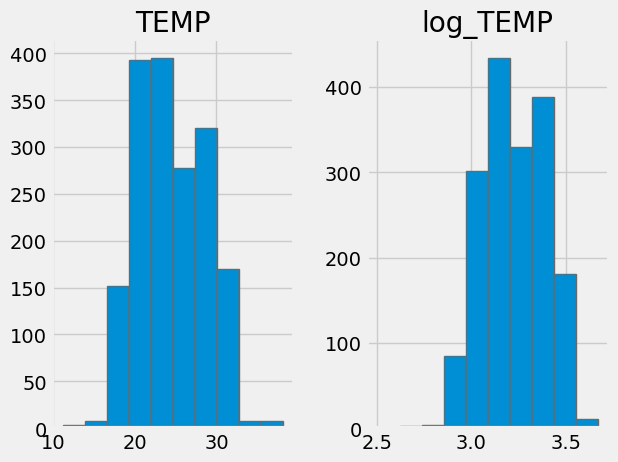

In [26]:
# create new dataframe to compare the original vs log transform data
dist_df = pd.DataFrame({'TEMP' : df2['TEMP'].values, 'log_TEMP' : dataset[:,0]})

# histogram plot original vs log transform data
plt.figure(figsize=(12,5))
dist_df.hist();